In [ ]:
import sys

def custom_exc(shell, etype, value, tb, tb_offset=None):
    print("Problem: {}".format(value), file=sys.stderr)
    return None

get_ipython().set_custom_exc((AssertionError,), custom_exc)

In [1]:
import kechain2

kechain2.login("***REMOVED***")

In [47]:
front_wheel = kechain2.part('Front Wheel')
diameter = front_wheel.property('Diameter')
diameter.value = 20

In [48]:
kechain2.part('Bike').property('Gears').value

6

In [49]:
kechain2.parts('Bike', category=None)

Part,Category,ID
Bike,MODEL,df504613-7bca-428a-974f-e1f8aee933f3
Bike,INSTANCE,a8751a67-ce63-4308-81a7-e47712376782


In [50]:
project = kechain2.scope('Bike Project')
project.part('Frame')

Property,Value
Material,Aluminum
Color,KE-works orange


In [41]:
project.parts(model=project.model('Wheel'))

Part,ID
Front Wheel,fe1b868a-894a-406f-a78d-33e57578a2e9
Rear Wheel,6f773001-5b7e-452d-a46b-c98361170753
Jochem,d2801531-b0b8-43e8-8133-7dff3ed7adda
Jochem,0135319f-450e-4eaf-b144-d256b22ef308
Jochem,ba6621c2-9115-4976-977b-8a4f74fd44b7
Wheel,bb755d13-d2fe-4a42-9b32-4c24941422a0


In [3]:
from IPython.display import display

task = kechain2.activity("Specify wheel diameter")

for p in task.parts():        
    display(p)

Property,Value
Gears,6
Total height,None
Picture,attachments/46172f2b-0345-4506-91a4-1b60eed98bf8/plot_N7kJ81v.png
Description,None
Expiring date,None
Website,None
Sale?,None


Property,Value
Material,Aluminum


In [10]:
kechain2.properties('Diameter')[1].part.property('Spokes').value = 200

In [25]:
wheel = kechain2.model('Wheel')
bike = kechain2.part('Bike')

bike.add(wheel)

Property,Value
Diameter,None
Spokes,None
Rim Material,None
Tire Thickness,None


In [28]:
import math
import random

wheel_model = kechain2.part(name='Wheel', category='MODEL')
wheels = kechain2.parts(model=wheel_model)

for wheel in wheels:
    num_spokes = random.randint(1, 10)
    noise = random.random() * 3
    
    wheel.property('Spokes').value = num_spokes
    wheel.property('Diameter').value = 10 * math.sin(num_spokes) + noise

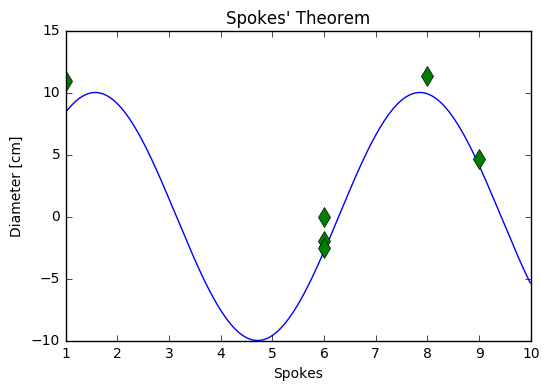

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 10, 0.01)
y = 10 * np.sin(x)
plt.plot(x, y)

wheels = kechain2.parts(model=kechain2.model('Wheel'))
plt.plot(wheels['Spokes'], wheels['Diameter'], 'd', markersize=10)

plt.xlabel('Spokes')
plt.ylabel('Diameter [cm]')
plt.title('Spokes\' Theorem')

kechain2.part('Bike').property('Picture').value = plt.gcf()

plt.show()